In [ ]:
import pandas as pd
import numpy as np

from collections import OrderedDict
from numpy import loadtxt
from numpy import savetxt
from sklearn.decomposition import TruncatedSVD 

#ดาวน์โหลดข้อมูลค่าความสัมพันธ์ระหว่าง item-item
def loadData(pathFile):
  return loadtxt(pathFile, delimiter=',')

#แนะนำสินค้า 10 ชิ้น จากสินค้า id xxxxxx
def recommendProduct(idProduct, product_user_table, corrdataSource = 'corrdata.csv'): #!!หาวิธีกำหนดค่า defaults
  '''
  This function will return list of 10 recommended products.
  product_user_table is table which index is product_id, and columns is user_id.
  for value in this table is user_score.
  '''
  #i คือสินค้าที่ซื้อไปแล้ว
  correlation_matrix = loadData(corrdataSource)
  i = list(product_user_table.index).index(idProduct)
  print(i)
  print(correlation_matrix[i])
  correlation_product_ID = correlation_matrix[i]
  #Sort ค่า correlation พร้อมบอกตำแหน่ง
  my_dict = {}
  for m in range (0, len(product_user_table.index)):
    key = product_user_table.index[m]
    value = correlation_product_ID[m]
    my_dict[key] = value
  my_dict.pop(idProduct)
  print(my_dict)
  sorted_tuples = sorted(my_dict.items(), key=lambda item: item[1], reverse = True)
  print(sorted_tuples)  # [(1, 1), (3, 4), (2, 9)]
  sorted_dict = {k: v for k, v in sorted_tuples}
  recommend = list(product_user_table.index[correlation_product_ID > 0.90])
  recommend.remove(idProduct)
  print(recommend)
  return list(sorted_dict.keys())

#เรียนรู้ข้อมูล หาค่าความสัมพันธ์
def learn(product_user_table):
  SVD = TruncatedSVD(n_components = 12)
  decomposed_matrix = SVD.fit_transform(product_user_table)
  correlation_matrix = np.corrcoef(decomposed_matrix)
  savetxt('corrdata.csv', correlation_matrix, delimiter=",")
  print("Finished learning!!")

#แปลงข้อมูลให้อยู่ในรูปแบบตารางที่เหมาะสม คือ index เป็น product_id columns เป็น user_id
#value คือ user score เติมค่าว่างด้วย 0
def createTable(csvFile):
  dataset = pd.read_csv(csvFile, sep=",")
  user_product_score = dataset.pivot_table(values='user_score', index='user_id', columns='product_id', fill_value=0)
  return user_product_score.T



In [ ]:
dataset = createTable("/content/df_eCommerce_10000_rows.csv")
learn(dataset)
id_product = 1002532
print(recommendProduct(id_product,dataset,corrdataSource="/content/corrdata.csv"))

Finished learning!!
3
[ 0.47651114 -0.40752051 -0.87056607 ...  0.03032715  0.02672343
 -0.50346352]
{1002101: 0.47651113698391023, 1002524: -0.4075205082061875, 1002528: -0.8705660685806244, 1002535: -0.15245310029871012, 1002540: 0.18847948057241024, 1002544: 0.7954006409186491, 1002547: -0.2962433921915081, 1002548: 0.30105084186837305, 1002629: -0.20837087907902743, 1002633: -0.5505018148969034, 1002634: -0.014482676118487333, 1003285: -0.18527173759651222, 1003304: -0.05666315723815735, 1003305: 0.0852902826625245, 1003306: 0.21999189712110356, 1003310: -0.02365135695837112, 1003311: 0.5857510348426271, 1003312: 0.19193192195213324, 1003316: 0.28564018419252996, 1003317: 0.5978180461923742, 1003318: -0.2133778768043697, 1003768: -0.15059205007086404, 1003769: -0.13880594833738685, 1003879: 0.026256623595363716, 1003943: -0.15586188416200136, 1004144: 0.21367836445538926, 1004161: -0.02624480183416999, 1004209: -0.47031425257504267, 1004210: -0.5284714437637192, 1004225: 0.02821365

In [ ]:
#ตัดคำ
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
nltk.download('all')

def keyword(text) :
  stop_words = set(stopwords.words('english')).union(set(string.punctuation)) 
  word_tokens = word_tokenize(text)
  filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]
  lemmatizer = WordNetLemmatizer()
  lemmatize_words = [lemmatizer.lemmatize(word) for word in filtered_sentence]
  final_lower_text = [word.lower() for word in lemmatize_words]

  count_keyword = {}
  for keyword in final_lower_text:
    try:
      count_keyword[keyword] += 1
    except KeyError:
      count_keyword[keyword] = 1
  return count_keyword

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping corpora/biocreative_ppi.zip.
[nltk_data]    | Downloading package brown to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown.zip.
[nltk_data]    | Downloading package brown_tei to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/brown_tei.zip.
[nltk_data]    | Downloading package cess_cat to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_cat.zip.
[nltk_data]    | Downloading package cess_esp to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/cess_esp.zip.
[nltk_data]    | Downloading package chat80 to /root/nltk_data...
[nltk_data]    |   Unzipp

In [ ]:
keyword("T-shirt cat")

{'cat': 1, 't-shirt': 1}

In [ ]:
id_product = 1002532
recommend = recommendProduct(id_product,dataset,corrdataSource="/content/corrdata.csv")
print(recommend)
print(len(recommend))

3
[-0.51038184 -0.30606575  0.55455841 ...  0.55026456 -0.61815912
 -0.17873781]
{1002101: -0.5103818427777866, 1002524: -0.3060657494143711, 1002528: 0.5545584112262957, 1002535: 0.2904071605899911, 1002540: -0.6018137859380006, 1002544: -0.15189492805539068, 1002547: 0.4297944933137409, 1002548: 0.41210640185124026, 1002629: -0.33220125152089247, 1002633: -0.2756600820139173, 1002634: 0.2064640335459015, 1003285: -0.4701773635871022, 1003304: 0.09281238960892019, 1003305: -0.544959578894414, 1003306: 0.03759139332120368, 1003310: 0.38143976780100836, 1003311: 0.34283431648052104, 1003312: 0.13987171927239161, 1003316: -0.18832987256770808, 1003317: -0.3176551086376465, 1003318: -0.1794066633285219, 1003768: -0.08960641056367774, 1003769: -0.36225572009754997, 1003879: -0.14168468295163436, 1003943: 0.2882243423080882, 1004144: 0.49119331028937796, 1004161: -0.5568851870789928, 1004209: -0.22579233109386776, 1004210: -0.7348052848498362, 1004225: 0.43027820532927363, 1004226: 0.224847

In [ ]:
ini_dict = {'a' : 'akshat', 'b' : 'bhuvan', 'c': 'chandan'}
  
# printing iniial_dictionary
print("intial_dictionary", str(ini_dict))
  
# split dictionary into keys and values
keys = ini_dict.keys()
values = ini_dict.values()
  
# printing keys and values separately
print ("keys : ", str(keys))
print ("values : ", str(values))

intial_dictionary {'a': 'akshat', 'b': 'bhuvan', 'c': 'chandan'}
keys :  dict_keys(['a', 'b', 'c'])
values :  dict_values(['akshat', 'bhuvan', 'chandan'])


In [ ]:
list(dataset.index).index(2702280)

603

In [ ]:
import pandas as pd
dataset = pd.read_csv ("/content/df_eCommerce_10000_rows.csv", sep=",")
dataset

,Unnamed: 0,user_id,product_id,user_score,user_purchase,category_code,main_category,brand,price
0,0,514151444,1307310,100,1,computers.notebook,computers,acer,308.86
1,30,548027895,1306208,100,1,computers.notebook,computers,lenovo,540.53
2,60,518839713,1305977,100,1,computers.notebook,computers,apple,2496.59
3,90,531174154,1401333,100,1,computers.desktop,computers,acer,453.59
4,120,515557805,1307073,100,1,computers.notebook,computers,acer,669.00
...,...,...,...,...,...,...,...,...,...
9995,995,514415509,30500017,3,0,country_yard.cultivator,country_yard,carver,321.76
9996,996,543942924,30500016,3,0,country_yard.cultivator,country_yard,viking,574.02
9997,997,514049006,30500002,3,0,country_yard.cultivator,country_yard,huter,316.07
9998,998,548875301,30500016,3,0,country_yard.cultivator,country_yard,viking,574.02


In [ ]:
#ดูว่าสินค้านี้ลูกค้าคนอื่นจะซื่้ออะไรต่อ
dataset.user_score.value_counts()

5      838
4      813
6      659
3      602
100    586
      ... 
43       4
47       4
49       3
48       3
99       2
Name: user_score, Length: 99, dtype: int64

In [ ]:
#สร้างตารางระหว่าง interaction ของuserกับ product
user_product_score = dataset.pivot_table(values='user_score', index='user_id', columns='product_id', fill_value=0)
user_product_score 

product_id,1002101,1002524,1002528,1002532,1002535,1002540,1002544,1002547,1002548,1002629,1002633,1002634,1003285,1003304,1003305,1003306,1003310,1003311,1003312,1003316,1003317,1003318,1003768,1003769,1003879,1003943,1004144,1004161,1004209,1004210,1004225,1004226,1004237,1004238,1004246,1004247,1004249,1004250,1004258,1004259,...,52900060,52900063,52900066,52900068,52900071,52900079,52900080,52900082,52900086,52900087,52900095,52900101,52900102,52900123,52900124,52900129,52900133,52900140,52900141,52900143,52900144,52900145,52900146,52900148,52900149,52900150,52900153,52900154,52900157,52900181,53400072,53400074,53400081,53400082,53400087,53400094,55000006,55000008,55000009,55000014
user_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
321655812,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
373096692,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
375394051,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
400973110,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
419915040,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
566175264,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
566211779,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
566223678,0,62,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
user_product_score.shape

(8613, 4097)

In [ ]:
X = user_product_score.T
X

user_id,321655812,373096692,375394051,400973110,419915040,450057886,450756413,457907080,469090322,472099506,475576220,478529085,479529213,482204269,486578007,487396904,493995753,503255307,503258118,505927507,508960684,510595720,512363712,512364594,512365732,512366512,512366797,512367358,512367789,512368705,512369172,512369506,512369885,512370808,512370945,512371416,512371825,512371934,512372651,512373126,...,565666679,565668037,565681857,565702794,565715304,565736808,565753204,565765445,565773881,565786289,565807061,565812184,565826705,565832862,565835094,565877273,565882050,565980849,565981081,565986342,565988701,565993635,566001769,566010314,566025338,566025992,566028385,566034979,566047530,566069851,566077917,566079542,566122879,566139597,566165785,566175264,566211779,566223678,566227497,566267483
product_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1002101,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002524,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,62,0,0
1002528,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002532,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1002535,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53400094,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55000006,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
55000008,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [ ]:
X1 = X

In [ ]:
#Decomposing matrix
from sklearn.decomposition import TruncatedSVD
SVD = TruncatedSVD(n_components = 12)
decomposed_matrix = SVD.fit_transform(X)
decomposed_matrix.shape

(4097, 12)

In [ ]:
import numpy as np
correlation_matrix = np.corrcoef(decomposed_matrix)
correlation_matrix.shape

(4097, 4097)

In [ ]:
correlation_matrix

array([[ 1.        ,  0.05176823, -0.65691543, ...,  0.00504594,
         0.32568443,  0.52520129],
       [ 0.05176823,  1.        , -0.10776082, ...,  0.5842157 ,
        -0.06377924,  0.39701794],
       [-0.65691543, -0.10776082,  1.        , ..., -0.08969503,
        -0.60137439, -0.74145386],
       ...,
       [ 0.00504594,  0.5842157 , -0.08969503, ...,  1.        ,
        -0.23782632,  0.5039054 ],
       [ 0.32568443, -0.06377924, -0.60137439, ..., -0.23782632,
         1.        ,  0.38162373],
       [ 0.52520129,  0.39701794, -0.74145386, ...,  0.5039054 ,
         0.38162373,  1.        ]])

In [ ]:
X.index[3]

1002532

In [ ]:
i = 1002532 #i คือสินค้าที่ซื้อไปแล้ว
product_names = list(X.index)
product_ID = product_names.index(i)
product_ID

3

In [ ]:
correlation_product_ID = correlation_matrix[product_ID]
correlation_product_ID.shape

(4097,)

In [ ]:
Recommend = list(X.index[correlation_product_ID > 0.90])

# Removes the item already bought by the customer
Recommend.remove(i) 

Recommend[0:9]

[1003305,
 1003316,
 1004993,
 1306208,
 1306646,
 1307184,
 1480428,
 1801796,
 1801910]

In [ ]:
#ตอนนี้คือเหมือนแค่หาความสัมพันธ์ระหว่างกัน แล้วหาว่าสินค้าไหนให้ค่า >0.90 ให้โชว์มา 10 อัน

In [ ]:
#หาความสัมพันธ์กัน ใช้ cosine similarity

In [ ]:
import nltk
nltk.download('all')

In [ ]:
#ตัดคำ
#lowering casing -> lemmatisation -> stop_removal 
#-> normalization -> noise removal-> text enrichment/aumentation

#remove word -> stemming -> convert to lower -> tokenize

text = """Founded in 2002, SpaceX’s mission is to enable humans to become a spacefaring civilization and a multi-planet 
species by building a self-sustaining city on Mars. In 2008, SpaceX’s Falcon 1 became the first privately developed 
liquid-fuel launch vehicle to orbit the Earth."""
# Splits at space 

import nltk
import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
stop_words = set(stopwords.words('english')).union(set(string.punctuation)) 
word_tokens = word_tokenize(text)
filtered_sentence = [w for w in word_tokens if not w.lower() in stop_words]

In [ ]:
from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
lemmatize_words = [lemmatizer.lemmatize(word) for word in filtered_sentence]
final_lower_text = [word.lower() for word in lemmatize_words]
final_lower_text

['founded',
 '2002',
 'spacex',
 '’',
 'mission',
 'enable',
 'human',
 'become',
 'spacefaring',
 'civilization',
 'multi-planet',
 'specie',
 'building',
 'self-sustaining',
 'city',
 'mars',
 '2008',
 'spacex',
 '’',
 'falcon',
 '1',
 'became',
 'first',
 'privately',
 'developed',
 'liquid-fuel',
 'launch',
 'vehicle',
 'orbit',
 'earth']

In [ ]:
count_keyword = {}
for keyword in final_lower_text:
  try:
    count_keyword[keyword] += 1
  except KeyError:
    count_keyword[keyword] = 1
count_keyword

{'1': 1,
 '2002': 1,
 '2008': 1,
 'became': 1,
 'become': 1,
 'building': 1,
 'city': 1,
 'civilization': 1,
 'developed': 1,
 'earth': 1,
 'enable': 1,
 'falcon': 1,
 'first': 1,
 'founded': 1,
 'human': 1,
 'launch': 1,
 'liquid-fuel': 1,
 'mars': 1,
 'mission': 1,
 'multi-planet': 1,
 'orbit': 1,
 'privately': 1,
 'self-sustaining': 1,
 'spacefaring': 1,
 'spacex': 2,
 'specie': 1,
 'vehicle': 1,
 '’': 2}

In [ ]:
#เปรียบเทียบ description
# Importing libraries

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.neighbors import NearestNeighbors
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score

In [ ]:
product_descriptions = pd.read_csv('../input/home-depot-product-search-relevance/product_descriptions.csv')
product_descriptions.shape

In [ ]:
import pandas as pd
product_descriptions = pd.DataFrame({"product_description": ["Laptop 123","Phone Nokia", "Ipad Apple 2021", "Notebook Laptop"]})

In [ ]:
product_descriptions = product_descriptions.dropna()
product_descriptions.shape
product_descriptions.head()

,product_description
0,Laptop 123
1,Phone Nokia
2,Ipad Apple 2021
3,Notebook Laptop


In [ ]:
product_descriptions1 = product_descriptions.head(500)
# product_descriptions1.iloc[:,1]

product_descriptions1["product_description"].head(10)

In [ ]:
vectorizer = TfidfVectorizer(stop_words='english')
X1 = vectorizer.fit_transform(product_descriptions["product_description"])
X1

<4x8 sparse matrix of type '<class 'numpy.float64'>'
	with 9 stored elements in Compressed Sparse Row format>

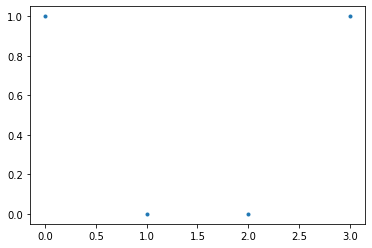

In [ ]:
# Fitting K-Means to the dataset
import matplotlib.pyplot as plt
X=X1

kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)
plt.plot(y_kmeans, ".")
plt.show()

In [ ]:
def print_cluster(i):
    print("Cluster %d:" % i),
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind]),
    print

In [ ]:
#output
# # Optimal clusters is 

true_k = 10

model = KMeans(n_clusters=true_k, init='k-means++', max_iter=100, n_init=1)
model.fit(X1)

print("Top terms per cluster:")
order_centroids = model.cluster_centers_.argsort()[:, ::-1]
terms = vectorizer.get_feature_names()
for i in range(true_k):
    print_cluster(i)

In [ ]:
def show_recommendations(product):
    #print("Cluster ID:")
    Y = vectorizer.transform([product])
    prediction = model.predict(Y)
    #print(prediction)
    print_cluster(prediction[0])

In [ ]:
show_recommendations("cutting tool")

In [ ]:
import string
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopwords = stopwords.words('english')

In [ ]:
sentences = ['This is a foo bar sentence', 'I like you', 'I do know', 'Laptop', 'I love you', 'Ipad']

In [ ]:
def clean_string(text):
  text = ''.join([word for word in text if word not in string.punctuation])
  text = text.lower()
  text = ' '.join([word for word in text.split() if word not in stopwords])
  return text

In [ ]:
cleaned = list(map(clean_string, sentences))
cleaned

['foo bar sentence', 'like', 'know', 'laptop', 'love', 'ipad']

In [ ]:
vectorizer = CountVectorizer().fit_transform(cleaned)
vectors = vectorizer.toarray()
vectors

array([[1, 1, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0],
       [0, 0, 1, 0, 0, 0, 0, 0]])

In [ ]:
csim = cosine_similarity(vectors)
csim

array([[1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 0., 1.]])

In [ ]:
def cosine_sim_vectors(vec1, vec2):
  vec1 = vec1.reshape(1, -1)
  vec2 = vec2.reshape(1, -1)
  return cosine_similarity(vec1, vec2)[0][0]

In [ ]:
cosine_sim_vectors(vectors[0], vectors[1])

0.0

In [ ]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
import scipy.spatial

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
corpus = ['A man is eating a food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']
query_embeddings = embedder.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))

     |████████████████████████████████| 78 kB 3.2 MB/s 
     |████████████████████████████████| 3.3 MB 10.8 MB/s 
     |████████████████████████████████| 3.3 MB 38.4 MB/s 
     |████████████████████████████████| 1.2 MB 36.1 MB/s 
     |████████████████████████████████| 61 kB 398 kB/s 
     |████████████████████████████████| 895 kB 43.0 MB/s 
  Created wheel for sentence-transformers: filename=sentence_transformers-2.1.0-py3-none-any.whl size=121000 sha256=2f50f07b6b4c13569f7f0340752bc66b76ea3797d8c45021e13a68e9cf97ebf8
  Stored in directory: /root/.cache/pip/wheels/90/f0/bb/ed1add84da70092ea526466eadc2bfb197c4bcb8d4fa5f7bad
Successfully built sentence-transformers


Downloading:   0%|          | 0.00/391 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/3.95k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/625 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/122 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/229 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/438M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/112 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/466k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/399 [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/232k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/190 [00:00<?, ?B/s]





Query: A man is eating pasta.

Top 5 most similar sentences in corpus:
A man is eating a piece of bread. (Score: 0.8480)
A man is eating a food. (Score: 0.7819)
Two men pushed carts through the woods. (Score: 0.2095)
A monkey is playing drums. (Score: 0.1945)
A man is riding a white horse on an enclosed ground. (Score: 0.1586)




Query: Someone in a gorilla costume is playing a set of drums.

Top 5 most similar sentences in corpus:
A monkey is playing drums. (Score: 0.7985)
A cheetah is running behind its prey. (Score: 0.2860)
The girl is carrying a baby. (Score: 0.2351)
A man is riding a horse. (Score: 0.2023)
A man is riding a white horse on an enclosed ground. (Score: 0.1963)




Query: A cheetah chases prey on across a field.

Top 5 most similar sentences in corpus:
A cheetah is running behind its prey. (Score: 0.9007)
Two men pushed carts through the woods. (Score: 0.3662)
A monkey is playing drums. (Score: 0.3061)
A man is riding a horse. (Score: 0.2930)
A man is riding a wh

In [ ]:
!pip install -U sentence-transformers

from sentence_transformers import SentenceTransformer
import scipy.spatial

embedder = SentenceTransformer('bert-base-nli-mean-tokens')

# Corpus with example sentences
corpus = ['A man is eating a food.',
          'A man is eating a piece of bread.',
          'The girl is carrying a baby.',
          'A man is riding a horse.',
          'A woman is playing violin.',
          'Two men pushed carts through the woods.',
          'A man is riding a white horse on an enclosed ground.',
          'A monkey is playing drums.',
          'A cheetah is running behind its prey.'
          ]
corpus_embeddings = embedder.encode(corpus)

# Query sentences:
queries = ['A man is eating pasta.', 'Someone in a gorilla costume is playing a set of drums.', 'A cheetah chases prey on across a field.']
query_embeddings = embedder.encode(queries)

# Find the closest 5 sentences of the corpus for each query sentence based on cosine similarity
closest_n = 5
for query, query_embedding in zip(queries, query_embeddings):
    distances = scipy.spatial.distance.cdist([query_embedding], corpus_embeddings, "cosine")[0]

    results = zip(range(len(distances)), distances)
    results = sorted(results, key=lambda x: x[1])

    print("\n\n======================\n\n")
    print("Query:", query)
    print("\nTop 5 most similar sentences in corpus:")

    for idx, distance in results[0:closest_n]:
        print(corpus[idx].strip(), "(Score: %.4f)" % (1-distance))

In [ ]:
import pandas as pd
import numpy as np
import random
from tqdm import tqdm
from gensim.models import Word2Vec 
import matplotlib.pyplot as plt
%matplotlib inline

import warnings;
warnings.filterwarnings('ignore')

In [ ]:
df = pd.read_excel('/content/Online Retail.xlsx')
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# remove missing values
df.dropna(inplace=True)

In [ ]:
df['StockCode']= df['StockCode'].astype(str)

In [ ]:
customers = df["CustomerID"].unique().tolist()
len(customers)

4372

In [ ]:
# shuffle customer ID's
random.shuffle(customers)

# extract 90% of customer ID's
customers_train = [customers[i] for i in range(round(0.9*len(customers)))]

# split data into train and validation set
train_df = df[df['CustomerID'].isin(customers_train)]
validation_df = df[~df['CustomerID'].isin(customers_train)]


In [ ]:
# list to capture purchase history of the customers
purchases_train = []

# populate the list with the product codes
for i in tqdm(customers_train):
    temp = train_df[train_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_train.append(temp)

purchases_train

100%|██████████| 3935/3935 [00:09<00:00, 401.95it/s]


[['22728',
  '22729',
  '22727',
  '22470',
  '21314',
  '22469',
  '21232',
  '22470',
  '22694',
  '22947',
  '23045',
  '23330',
  '84836',
  '21191',
  '21192',
  '22728',
  '22726',
  '23414',
  '22589',
  '22727',
  '22947',
  '21191',
  '23089',
  '84879',
  '23489',
  '23485',
  '23571'],
 ['22699',
  '20748',
  '23245',
  '23285',
  '23286',
  '23170',
  '23171',
  '84596F',
  '22697',
  '23164',
  '23161',
  '22173',
  '22479',
  '82494L',
  '23132',
  '22699',
  '22697',
  '23132',
  '22173',
  '23082',
  '23321',
  '22469',
  '21098',
  '22086',
  '23498',
  '23552',
  '23497',
  '23109',
  '22566',
  '23319',
  '23318',
  '22910',
  '22086',
  '22749',
  '84012',
  '22438',
  '84859C',
  '84032A',
  '22068',
  '84032B',
  '22069',
  '23076',
  '21479',
  '22513',
  '22512',
  '22418',
  '22627',
  '21175',
  '22694',
  '21742',
  '22469',
  '21034'],
 ['48194',
  '48188',
  '22149',
  '22150',
  '21922',
  '84795B',
  '84050',
  '84789',
  '21080',
  '22354',
  '16016',
  

In [ ]:
# list to capture purchase history of the customers
purchases_val = []

# populate the list with the product codes
for i in tqdm(validation_df['CustomerID'].unique()):
    temp = validation_df[validation_df["CustomerID"] == i]["StockCode"].tolist()
    purchases_val.append(temp)

100%|██████████| 437/437 [00:00<00:00, 757.66it/s]


In [ ]:
# train word2vec model
model = Word2Vec(window = 10, sg = 1, hs = 0,
                 negative = 10, # for negative sampling
                 alpha=0.03, min_alpha=0.0007,
                 seed = 14)

model.build_vocab(purchases_train, progress_per=200)

model.train(purchases_train, total_examples = model.corpus_count, 
            epochs=10, report_delay=1)

(3611325, 3650210)

In [ ]:
model.init_sims(replace=True)

In [ ]:
print(model)

Word2Vec(vocab=3157, size=100, alpha=0.03)


In [ ]:
# extract all vectors
X = model[model.wv.vocab]

X.shape

(3157, 100)

In [ ]:
products = train_df[["StockCode", "Description"]]

# remove duplicates
products.drop_duplicates(inplace=True, subset='StockCode', keep="last")

# create product-ID and product-description dictionary
products_dict = products.groupby('StockCode')['Description'].apply(list).to_dict()

In [ ]:
def similar_products(v, n = 6):
    
    # extract most similar products for the input vector
    ms = model.similar_by_vector(v, topn= n+1)[1:]
    
    # extract name and similarity score of the similar products
    new_ms = []
    for j in ms:
        pair = (products_dict[j[0]][0], j[1])
        new_ms.append(pair)
        
    return new_ms        

In [ ]:
similar_products(model['90019A'])

[('WHITE VINT ART DECO CRYSTAL NECKLAC', 0.8036490678787231),
 ('PINK BOUDICCA LARGE BRACELET', 0.7783463001251221),
 ('SILVER M.O.P ORBIT DROP EARRINGS', 0.7742154598236084),
 ('GREEN HEART OF GLASS BRACELET', 0.7601553201675415),
 ('BLUE MURANO TWIST BRACELET', 0.7553784847259521),
 ('GOLD/M.O.P PENDANT ORBIT NECKLACE', 0.7552241683006287)]

In [ ]:
#use purchase
def aggregate_vectors(products):
    product_vec = []
    for i in products:
        try:
            product_vec.append(model[i])
        except KeyError:
            continue
        
    return np.mean(product_vec, axis=0)

In [ ]:
len(purchases_val[0])

109

In [ ]:
aggregate_vectors(purchases_val[0]).shape

(100,)

In [ ]:
similar_products(aggregate_vectors(purchases_val[0]))

[('UTILTY CABINET WITH HOOKS', 0.7346296310424805),
 ('LOVE BUILDING BLOCK WORD', 0.7265828847885132),
 ('HOME BUILDING BLOCK WORD', 0.7186347842216492),
 ('CREAM HANGING HEART T-LIGHT HOLDER', 0.7154505848884583),
 ('CREAM SWEETHEART WALL CABINET', 0.6997805237770081),
 ('DOORMAT NEW ENGLAND', 0.688589870929718)]

In [ ]:
similar_products(aggregate_vectors(purchases_val[0][-10:]))

[('LOVE BUILDING BLOCK WORD', 0.7078046798706055),
 ('WOODEN STAR CHRISTMAS SCANDINAVIAN', 0.7061171531677246),
 ('WOODEN TREE CHRISTMAS SCANDINAVIAN', 0.694432258605957),
 ('HOME BUILDING BLOCK WORD', 0.679932713508606),
 ('HEART WOODEN CHRISTMAS DECORATION', 0.6548107862472534),
 ('HOT WATER BOTTLE KEEP CALM', 0.6376883387565613)]

In [ ]:
#Search engine
!wget https://msmarco.blob.core.windows.net/msmarcoranking/msmarco-docs.tsv.gz
!wget https://msmarco.blob.core.windows.net/msmarcoranking/msmarco-doctrain-queries.tsv.gz
!wget https://msmarco.blob.core.windows.net/msmarcoranking/msmarco-doctrain-top100.gz
	
!gzip -d msmarco-docs.tsv.gz
!gzip -d msmarco-doctrain-queries.tsv.gz
!gzip -d msmarco-doctrain-top100.gz

import pandas as pd
import numpy as np
import dask.dataframe as dd

--2021-12-15 07:35:24--  https://msmarco.blob.core.windows.net/msmarcoranking/msmarco-docs.tsv.gz
Resolving msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)... 20.150.34.4
Connecting to msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)|20.150.34.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 8446274598 (7.9G) [application/x-gzip]
Saving to: ‘msmarco-docs.tsv.gz’

msmarco-docs.tsv.gz 100%[===================>]   7.87G  4.91MB/s    in 18m 15s 

2021-12-15 07:53:39 (7.36 MB/s) - ‘msmarco-docs.tsv.gz’ saved [8446274598/8446274598]

--2021-12-15 07:53:39--  https://msmarco.blob.core.windows.net/msmarcoranking/msmarco-doctrain-queries.tsv.gz
Resolving msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)... 20.150.34.4
Connecting to msmarco.blob.core.windows.net (msmarco.blob.core.windows.net)|20.150.34.4|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6457962 (6.2M) [application/x-gzip]
Saving to: ‘msmar

ImportError: ignored

In [ ]:
queries_train=pd.read_table('msmarco-doctrain-queries.tsv',header=None)
queries_train.columns=['qid','query']
print('Shape=>',queries_train.shape)
queries_train.head()

In [ ]:

queries=queries_train.sample(n=2000,random_state=42).reset_index(drop=True)
print('Shape=>',queries.shape)
queries.head()

In [ ]:
# Creating Training Set of Queries
training_queries=queries.iloc[:1000]
print('Shape=>',training_queries.shape)
training_queries.head()

In [ ]:
# Creating Testing Set of Queries
testing_queries=queries.iloc[1000:]
print('Shape=>',testing_queries.shape)
testing_queries.head()

In [ ]:

train_top100=pd.read_table('/content/msmarco-doctrain-top100',delimiter=' ',header=None)
train_top100.columns=['qid','Q0','docid','rank','score','runstring']
print('Shape=>',train_top100.shape)
train_top100.head()

In [ ]:

# Reducing train_top100 for training
training_ranked100=train_top100[train_top100['qid'].isin(training_queries['qid'].unique())].reset_index(drop=True)
print('Shape=>',training_ranked100.shape)
training_ranked100.head()

In [ ]:
# Reducing train_top100 for testing
testing_ranked100=train_top100[train_top100['qid'].isin(testing_queries['qid'].unique())].reset_index(drop=True)
print('Shape=>',testing_ranked100.shape)
testing_ranked100.head()

In [ ]:
# Labelling Top 10 as 1 and last 10 as 0
rel=list(range(1,11))
nonrel=list(range(91,101))
training_ranked100['rel']=training_ranked100['rank'].apply(lambda x: 1 if x in rel else ( 0 if x in nonrel else np.nan))
testing_ranked100['rel']=testing_ranked100['rank'].apply(lambda x: 1 if x in rel else ( 0 if x in nonrel else np.nan))

# Result set for Training
training_result=training_ranked100.dropna()
training_result['rel']=training_result['rel'].astype(int)
print('Shape=>',training_result.shape)
training_result.head()

In [ ]:
# Result set for Testing
testing_result=testing_ranked100.dropna()
testing_result['rel']=testing_result['rel'].astype(int)
print('Shape=>',testing_result.shape)
testing_result.head()

In [ ]:

df=dd.read_table('msmarco-docs.tsv',blocksize=100e6,header=None)
df.columns=['docid','url','title','body']
df.head()

In [ ]:
def create_corpus(result):
  unique_docid=result['docid'].unique()
  condition=df['docid'].isin(unique_docid)
  corpus=df[condition].reset_index(drop=True)
  corpus=corpus.drop(columns='url')
  print('Number of Rows=>',len(corpus))
  return corpus

training_corpus=create_corpus(training_result)
training_corpus.head()

In [ ]:
testing_corpus=create_corpus(testing_result)
testing_corpus.head()

In [ ]:

temp_doc=training_corpus.sample(1)
print('Title=>',temp_doc.title.values)
print('Body:\n',temp_doc.body.values)

In [ ]:
for i,v in enumerate(training_queries['query'].sample(10)):
    print(i,'=>',v)